<a href="https://colab.research.google.com/github/tatianabarbone/stellar-classification/blob/master/stellar_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stellar Classification with Scikit-Learn

**Inspiration**



> I've always been fascinated by outer space-- especially stars, constellations and galaxies.  



![picture](https://images-assets.nasa.gov/image/PIA13459/PIA13459~orig.jpg)

This is a picture of a nebula surrounding the **supergiant star** CE-Camelopardalis.

Source: images.nasa.gov




> After doing some research online, I learned that stars can be classified into different categories depending on their quantitative measurements such as absolute magnitude and luminosity. Then I discovered the Hertzsprung–Russell diagram, which shows the relationships between these measures:

> Source: wikipedia.org


![picture](https://upload.wikimedia.org/wikipedia/commons/thumb/6/6b/HRDiagram.png/620px-HRDiagram.png)

> So, using [this star dataset](https://www.kaggle.com/deepu1109/star-dataset) from kaggle and different classification algorithms, I put python's scikit-learn library to the test to predict star type (Hypergiant, Supergiant, etc.) based on temperature,	luminosity,	radius and absolute magnitude.


## Exploring the Data

In [40]:
#Imports
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib import cm
from pandas.plotting import scatter_matrix

#Sklearn imports
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

I downloaded the csv file from kaggle and uploaded it directly into this notebook.

In [2]:
uploaded = files.upload()
stars = pd.read_csv('6_class_csv.csv')

Saving 6_class_csv.csv to 6_class_csv.csv


In [3]:
stars.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M


In [4]:
stars.shape

(240, 7)

We have 240 different stars and 7 features we are dealing with.

In [26]:
print(stars['Star type'].unique())

[0 1 2 3 4 5]


We will create a correlation heatmap, which will show us which variables are correlated to each other.

*   1 = the most correlated
*   -1 = not correlated at all. 



In [6]:
corr = stars.corr()
corr

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type
Temperature (K),1.000000,0.393404,0.064216,-0.420261,0.411129
Luminosity(L/Lo),0.393404,1.000000,0.526516,-0.692619,0.676845
Radius(R/Ro),0.064216,0.526516,1.000000,-0.608728,0.660975
Absolute magnitude(Mv),-0.420261,-0.692619,-0.608728,1.000000,-0.955276
Star type,0.411129,0.676845,0.660975,-0.955276,1.000000


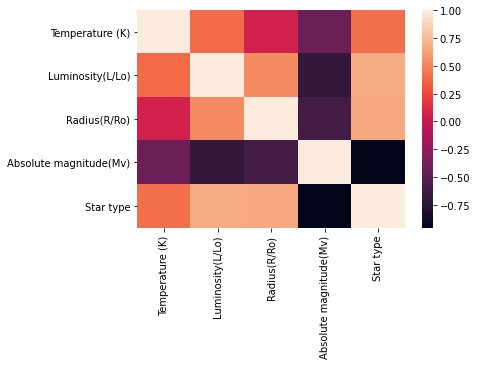

In [7]:
sns.heatmap(corr)

From the heatmap we can see that temperature, luminosity and radius have a strong correlation with star type.

Our features will be temperate, luminosity, radius and absolute magnitude. Star type will be the label.

In [8]:
feature_names = ['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)', 'Absolute magnitude(Mv)']
X = stars[feature_names]
y = stars['Star type']

For each feature, we'll make a scatter plot.

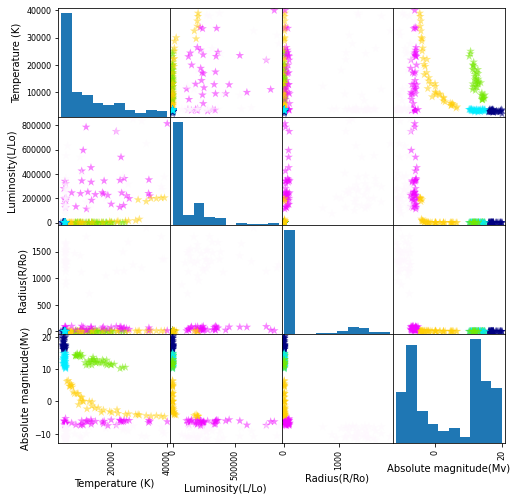

In [9]:
cmap = cm.get_cmap('gist_ncar')
scatter = pd.plotting.scatter_matrix(X, c = y, marker = '*', s=80, figsize=(8,8), cmap = cmap)

## Cross Validation

In [10]:
# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [11]:
# Scale the data to improve modeling performance
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Building the Models



### Logistic Regression



In [12]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.82
Accuracy of Logistic regression classifier on test set: 0.78


### K-Nearest Neighbors

In [17]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.98
Accuracy of K-NN classifier on test set: 0.99


### Decision Tree

In [13]:
clf = DecisionTreeClassifier().fit(X_train, y_train)

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.99


In [14]:
print('Max depth:', clf.tree_.max_depth)

Max depth: 5


The ideal max_depth of our tree avoids overfitting the training data while giving it just the right amount of flexibility to capture the patterns in the training data. Ultimately we are aiming for the lowest error on our test set.

#### Visualizing the Decision Tree

In [15]:
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_2 <= 0.00
|   |--- class: 2
|--- feature_2 >  0.00
|   |--- feature_3 <= 0.86
|   |   |--- feature_3 <= 0.14
|   |   |   |--- class: 5
|   |   |--- feature_3 >  0.14
|   |   |   |--- feature_2 <= 0.00
|   |   |   |   |--- class: 1
|   |   |   |--- feature_2 >  0.00
|   |   |   |   |--- feature_3 <= 0.22
|   |   |   |   |   |--- class: 4
|   |   |   |   |--- feature_3 >  0.22
|   |   |   |   |   |--- class: 3
|   |--- feature_3 >  0.86
|   |   |--- class: 0



The text representation is cool, but a colorful diagram with arrows would be much cooler!

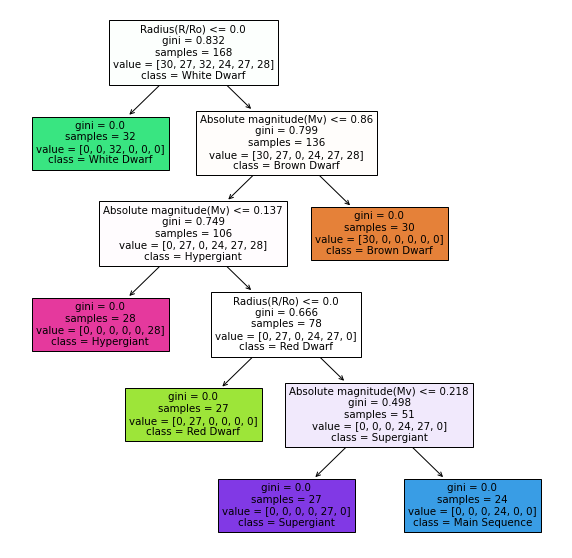

In [16]:
class_names = ['Brown Dwarf', 'Red Dwarf', 'White Dwarf', 'Main Sequence', 'Supergiant', 'Hypergiant'] #indices correspond to star type

fig = plt.figure(figsize=(10,10))
_ = tree.plot_tree(clf, feature_names=feature_names, class_names=class_names, filled=True)

### Linear Discriminant Analysis

In [18]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

print('Accuracy of LDA classifier on training set: {:.2f}'
     .format(lda.score(X_train, y_train)))
print('Accuracy of LDA classifier on test set: {:.2f}'
     .format(lda.score(X_test, y_test)))

Accuracy of LDA classifier on training set: 0.98
Accuracy of LDA classifier on test set: 0.99


#### Visualizing LDA
The goal of LDA is to find a linear combination of features that best separates two classes.

Our dataset has four features, so it would be difficult to visualize the decision boundary (a line) in a 4D plane. 

To visualize the data, we'll need to reduce the features to two, then use LDA to classify the features.

This code was used and modified from the [sklearn docs](https://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_vs_lda.html#sphx-glr-auto-examples-decomposition-plot-pca-vs-lda-py): 

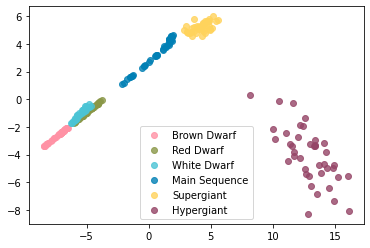

In [19]:
lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(X, y).transform(X)

colors = ['#ff92a5', '#8a9747','#4bc4d5', '#0180b5','#ffd35c','#954567']

for color, i, name in zip(colors, [0,1,2,3,4,5], class_names):
    plt.scatter(X_r2[y == i, 0], X_r2[y == i, 1], alpha=.8, color=color,
                label=name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.show()

### Support Vector Machine

In [21]:
svm = SVC()
svm.fit(X_train, y_train)

print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y_test)))

Accuracy of SVM classifier on training set: 0.96
Accuracy of SVM classifier on test set: 0.94


### Gaussian Naive Bayes

In [20]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(gnb.score(X_train, y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'
     .format(gnb.score(X_test, y_test)))

Accuracy of GNB classifier on training set: 1.00
Accuracy of GNB classifier on test set: 0.97


## Classification Report and Final Comments

The Decision Tree algorithm was the most accurate, but KNN and LDA were not far behind. **In fact, most of the algorithms were very accurate due to the small dataset size.**

Using the classification report and confusion matrix, we can visualize the performance of the decision tree model.

In [24]:
pred = clf.predict(X_test)
print(confusion_matrix(y_test, pred))

[[10  0  0  0  0  0]
 [ 0 13  0  0  0  0]
 [ 0  0  8  0  0  0]
 [ 0  1  0 15  0  0]
 [ 0  0  0  0 13  0]
 [ 0  0  0  0  0 12]]


The confusion matrix shows that we made one error (3rd row, 2nd column), incorrectly classifying a Main Sequence star as a Red Dwarf.

In [25]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.93      1.00      0.96        13
           2       1.00      1.00      1.00         8
           3       1.00      0.94      0.97        16
           4       1.00      1.00      1.00        13
           5       1.00      1.00      1.00        12

    accuracy                           0.99        72
   macro avg       0.99      0.99      0.99        72
weighted avg       0.99      0.99      0.99        72



The classification report tells us about True Positives, False Positives, True Negatives and False Negatives.

*   Precision: the ratio of true positives to the sum of true and false positives.
*   Recall: the ratio of true positives to the sum of true positives and false negatives. 
*   F1 Score: 2*(Recall * Precision) / (Recall + Precision) 
